# Linear Algebra

ဒီနေ့ Linear Algebra ကို ဆွေးနွေးမှာ ဖြစ်တယ်။ 

1. ပထမဆုံး Linear Algebra ကို အသုံးချပြီး PCA နဲ့ SVD လုပ်တာကို လက်တွေ့လုပ်ကြည့်ကြမယ်။
2. ပြီးရင် Matrix နဲ့ Vector တွေ အကြောင်းကို ဆက်မယ်။ 
3. နောက်မှာ Transformation တွေကို ဆက်ကြည့်ပြီး ... 
4. Eigen values/Eigen vectors တွေနဲ့ အဆုံးသတ်မယ်။ 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from utils import get_image

In [ ]:
img_1 = get_image()
plt.imshow(img_1, cmap="gray")
plt.show()

In [ ]:
print (img_1.ndim, img_1.shape, img_1.size)

In [ ]:
from numpy import linalg
U, s, Vt = linalg.svd(img_1)
print (U.ndim, U.shape, U.size)
print (s.ndim, s.shape, s.size)
print (Vt.ndim, Vt.shape, Vt.size)

In [ ]:
# this will give a value error
approx_1 = U @ s @ Vt

In [ ]:
# let's just use the first 64 values of s and first 64 rows of Vt
k = 32
s_ = s[:k]
Vt_ = Vt[:k, :]

In [2]:
import numpy as np

Sigma = np.zeros((U.shape[1], Vt_.shape[0]))
np.fill_diagonal(Sigma, s_)

approx_1 = np.matmul(U, np.matmul(Sigma, Vt_)) # U @ Sigma @ Vt_
plt.imshow(approx_1, cmap="gray")
plt.show()

NameError: name 'U' is not defined

In [ ]:
print ("total size of U, s_ and Vt_ is : ")
print (U.size + s_.size + Vt_.size)
print ("original image size is : ")
print (img_1.size)
print ("compression ratio : {}/{} = {}".format(U.size + s_.size + Vt_.size, img_1.size, (U.size + s_.size + Vt_.size)/img_1.size))

In [ ]:
# let's do for all colors
img_1 = get_image(grayscale=False)
img_1_transposed = np.transpose(img_1, (2, 0, 1))
U, s, Vt = linalg.svd(img_1_transposed)
s_ = s[:, :k]
Vt_ = Vt[:, :k, :]
Sigma = np.zeros((3, 768, 1024))
for j in range(0, 3):
    np.fill_diagonal(Sigma[j, :, :], s_[j, :])


In [ ]:
approx_img = np.matmul(U, np.matmul(Sigma[..., :k], Vt_[..., :k, :])) # U @ Sigma[..., :k] @ Vt_[..., :k, :]
print (approx_img.shape)

In [ ]:
plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()

In [ ]:
print ("total size of U, s_ and Vt_ is : ")
print (U.size + s_.size + Vt_.size)
print ("original image size is : ")
print (img_1.size)
print ("compression ratio : {}/{} = {}".format(U.size + s_.size + Vt_.size, img_1.size, (U.size + s_.size + Vt_.size)/img_1.size))

### Wait! What? Sorcery?

တကယ့်လက်တွေ့မှာ jpeg/png, mpeg, mp3 compression တွေဟာ (ဒီထက် အဆင့်မြင့်ပေမဲ့) ဒီဟာနဲ့ သဘောတရားတူတဲ့ Linear Algebra အခြေခံ နည်းလမ်းတွေကို အသုံးပြုထားတာ ဖြစ်ပါတယ်။

Data Science မှာကတော့ Data တွေဟာ Dimension တွေ သိပ်များနေရင် (column တွေ သိပ်များနေရင်) ချုံ့ပစ်ဖို့ Dimensionality Reduction Technique အနေနဲ့ အသုံးပြုကြပါတယ်။ PCA ရယ် SVD ရယ်ဆိုပြီး လူသိများပါတယ်။ တကယ်တမ်းကတော့ အဲဒီ ၂ ခုဟာ ခပ်ဆင်ဆင်ပါပဲ။ နောက်ပိုင်းမှာ model ဆောက်တဲ့နားရောက်ရင် အဲဒါတွေကို အကျယ်ပြောပါမယ်။ 

လောလောဆယ်ကတော့ Linear Algebra အကြောင်းကို အသေးစိတ် လေ့လာရအောင်ပါ။

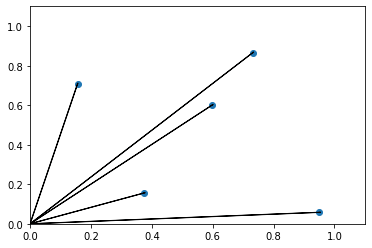

In [3]:
from utils import plot_points_and_vectors
np.random.seed(42)

my_points = np.array([
    np.random.random(size=5),
    np.random.random(size=5)
])
my_points = np.vstack((my_points, np.ones(5)))

    
plot_points_and_vectors(my_points=my_points)

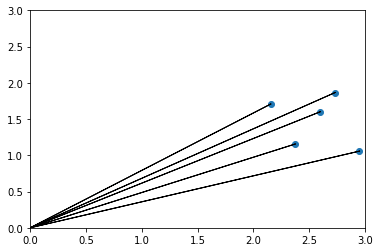

In [4]:
def get_translation_matrix(dx, dy):
    A_translate = np.array([
        [1.0, 0, dx],
        [0, 1.0, dy],
        [0, 0, 1.0]
    ])
    return A_translate

A_trans = get_translation_matrix(2, 1)
my_points_translated = A_trans @ my_points
plot_points_and_vectors(my_points=my_points_translated, xlim=(0.0, 3.0), ylim=(0.0, 3.0))

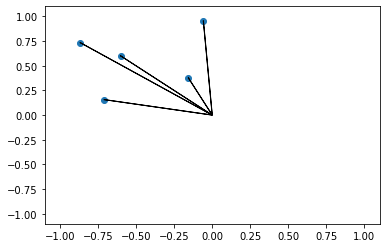

In [5]:
import math
def get_rotation_matrix(theta):
    A_rotation = np.array([
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0.0, 0.0, 1.0]
    ])
    return A_rotation

A_rotate = get_rotation_matrix(math.pi/2)
my_points_rotated = A_rotate @ my_points
plot_points_and_vectors(my_points_rotated, xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

In [ ]:
# try to implement dilation